In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
india_stations_df = pd.read_pickle('../2015-2020-pm25/india_stations.pkl')
india_stations_pm25_list = pd.read_pickle('../2015-2020-pm25/india_stations_pm25.pkl')

In [3]:
import configparser

config = configparser.ConfigParser()
config.read("./config.ini")

city = "Bengaluru"

START = config['period']['start_date']
END   = config['period']['end_date']

In [4]:
city_station_ids = india_stations_df[india_stations_df['City'] == city]['StationId'].values

In [5]:
city_stations_pm25_list = []

for df in india_stations_pm25_list:
    if df['StationId'].values[0] in city_station_ids:
        city_stations_pm25_list.append(df)

In [6]:
india_stations_df

,StationName,StationId,City,Latitude,Longitude
0,"Secretariat, Amaravati - APPCB",AP001,Amaravati,16.504561,80.523517
1,"GVM Corporation, Visakhapatnam - APPCB",AP005,Visakhapatnam,17.748887,83.247789
2,"Railway Colony, Guwahati - APCB",AS001,Guwahati,26.179587,91.784315
3,"DRM Office Danapur, Patna - BSPCB",BR005,Patna,25.585624,85.044299
4,"Govt. High School Shikarpur, Patna - BSPCB",BR006,Patna,25.587980,85.094986
...,...,...,...,...,...
122,"Fort William, Kolkata - WBPCB",WB009,Kolkata,22.554246,88.335874
123,"Jadavpur, Kolkata - WBPCB",WB010,Kolkata,22.495500,88.370900
124,"Rabindra Bharati University, Kolkata - WBPCB",WB011,Kolkata,22.584454,88.359384
125,"Rabindra Sarobar, Kolkata - WBPCB",WB012,Kolkata,22.512145,88.363695


In [7]:
# idx = np.random.randint(len(city_stations_pm25_list))
idx = 5
station_df = city_stations_pm25_list[idx][:END]

In [8]:
station_id = station_df['StationId'].values[0]
station_data = india_stations_df[india_stations_df['StationId'] == station_id].values[0]

station_df['Place'] = station_data[0]
station_df['City'] = station_data[1]
station_df['Latitude'] = station_data[3]
station_df['Longitude'] = station_data[4]

<ipython-input-8-ae0d2c0a6eee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['Place'] = station_data[0]
<ipython-input-8-ae0d2c0a6eee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['City'] = station_data[1]
<ipython-input-8-ae0d2c0a6eee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [9]:
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2017-01-01,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-02,KA009,39.81,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-03,KA009,28.26,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-04,KA009,45.89,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-05,KA009,43.28,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676


In [10]:
station_df.tail()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2020-03-11,KA009,41.75,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2020-03-12,KA009,41.31,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2020-03-13,KA009,40.26,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2020-03-14,KA009,41.43,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2020-03-15,KA009,39.70,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676


In [11]:
def plot_ts(df, name, columns=['PM2.5']):
    fig = plt.figure(figsize=(18, 4))
    df[columns].plot(c='k', ax=fig.gca())
    plt.title(name)
    plt.ylabel('PM2.5')
    plt.grid(ls='--')
    plt.show()

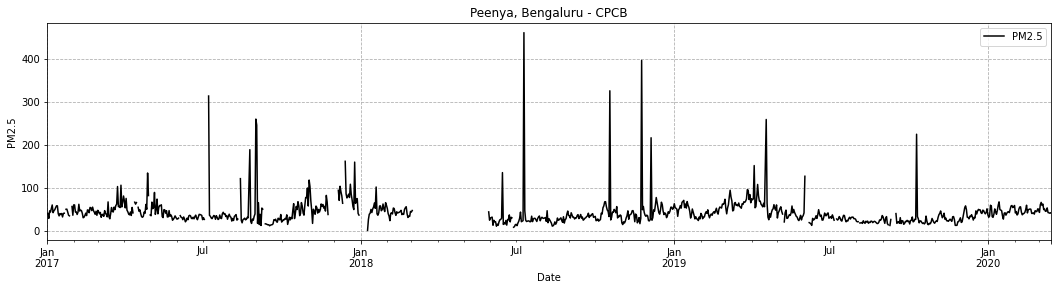

In [12]:
plot_ts(station_df, station_data[0])

In [13]:
station_df[station_df['PM2.5'].isnull()]

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2017-01-01,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-22,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-28,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-29,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-04-12,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
...,...,...,...,...,...,...
2019-09-11,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2019-09-12,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2019-09-13,KA009,NaN,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676


In [14]:
def previous_window_impute(station_df, window_length=7):
    column = "PM2.5"
    try:
        for idx, value in enumerate(station_df[column].values):
            if np.isnan(value):
                station_df[column][idx] = station_df[column][idx - window_length]
    except:
        pass
    return station_df

In [15]:
station_df = previous_window_impute(station_df)

<ipython-input-14-c3269d34fd44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df[column][idx] = station_df[column][idx - window_length]
<ipython-input-15-cc740762f2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df = previous_window_impute(station_df)


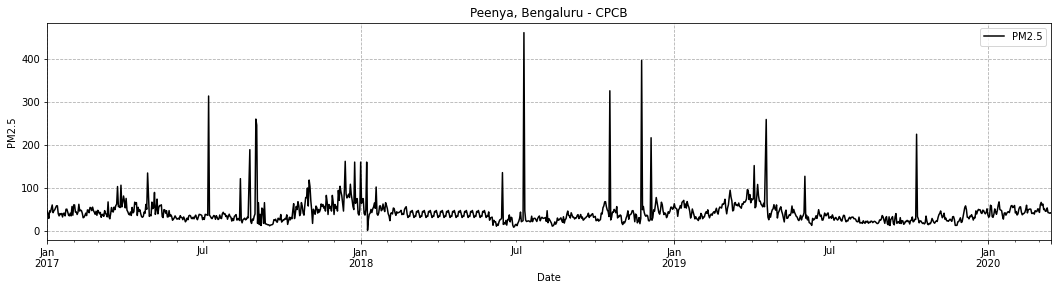

In [16]:
plot_ts(station_df, station_data[0])

In [17]:
station_df.index.freq = 'D'
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2017-01-01,KA009,45.31,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-02,KA009,39.81,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-03,KA009,28.26,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-04,KA009,45.89,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676
2017-01-05,KA009,43.28,"Peenya, Bengaluru - CPCB",KA009,13.028513,77.519676


In [18]:
station_pm25_df = pd.DataFrame(station_df['PM2.5'])

In [19]:
station_pm25_df.head()

,PM2.5
Date,
2017-01-01,45.31
2017-01-02,39.81
2017-01-03,28.26
2017-01-04,45.89
2017-01-05,43.28


In [20]:
def series_to_supervised(data, col_name='PM2.5', input_length=7, output_length=1, dropnan=True):
    features = 1 if type(data) is list else data.shape[1]
    df_new = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(input_length, 0, -1):
        cols.append(df_new.shift(i))
        names += [('%s(t-%d)' % (col_name, i)) for j in range(features)]
        
    for i in range(0, output_length):
        cols.append(df_new.shift(-i))
        if i == 0:
            names += [('%s(t)' % (col_name)) for j in range(features)]
        else:
            names += [('%s(t+%d)' % (col_name, i)) for j in range(features)]
    df_final = pd.concat(cols, axis=1)
    df_final.columns = names
    if dropnan:
        df_final.dropna(inplace=True)
    return df_final

In [21]:
reframed_df = series_to_supervised(station_pm25_df, input_length=1)
reframed_df.index.freq = 'D'
reframed_df.head()

,PM2.5(t-1),PM2.5(t)
Date,,
2017-01-02,45.31,39.81
2017-01-03,39.81,28.26
2017-01-04,28.26,45.89
2017-01-05,45.89,43.28
2017-01-06,43.28,51.39


In [22]:
X = reframed_df.values[:,:-1]
y = reframed_df.values[:,-1].reshape(-1,1)

ratio = 0.3
random_state = 42
length = X.shape[0]
limit = (int)(ratio * length)

X_train, X_test, y_train, y_test = X[:-limit], X[-limit:], y[:-limit], y[-limit:]
test_idx_values = reframed_df.index.to_pydatetime()[-limit:]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RepeatVector, Bidirectional
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [24]:
def update_model(model, X_train, y_train, batch_size, epochs=2):
    model.fit(X_train, y_train, epochs=epochs, 
                        batch_size=batch_size,
                        shuffle=False, verbose=0)
    return model

def get_predictions(model, batch_size, X_train, y_train, X_test, y_test):
    y_hat = []
    
    for i in range(len(X_test)):
        current_row = X_test[i].reshape(1, 1, X_test[i].shape[-1])
        current_pred = model.predict(current_row)[0]
        y_hat.append(current_pred)
    
        X_train = np.append(X_train[1:], [X_test[i]], axis=0)
        y_train = np.append(y_train[1:], y_test[0])
        
        model = update_model(model, X_train, y_train, batch_size)
    
    return model, y_hat       

In [25]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)

X_test_sc = sc_X.transform(X_test)
y_test_sc = sc_y.transform(y_test)

X_train_sc = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])
X_test_sc  = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

lstm_layers = 15
epochs = 25
batch_size = 4

def get_MLP_model():
    
    tf.random.set_seed(42)
    
    model = Sequential()
    model.add(Dense(lstm_layers, input_shape=(X_train_sc.shape[1], X_train_sc.shape[2])))
    model.add(Dense(lstm_layers//2))
    model.add(Dense(lstm_layers//4))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    model.fit(X_train_sc, y_train_sc, epochs=epochs, 
            batch_size=batch_size,
            shuffle=False, verbose=0) 
    
    model, y_pred = get_predictions(model, batch_size, X_train_sc, y_train_sc, X_test_sc, y_test_sc)
    y_pred = sc_y.inverse_transform(y_pred)
    y_pred = y_pred.reshape(-1, 1)
    
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return model, score, (sc_X, sc_y), y_pred

def get_LSTM_AutoEncoder_model():

    tf.random.set_seed(42)
    
    model = Sequential()
    model.add(LSTM(lstm_layers, input_shape=(X_train_sc.shape[1], X_train_sc.shape[2]), return_sequences=True))
    model.add(LSTM(lstm_layers//2))
    model.add(RepeatVector(1))
    model.add(LSTM(lstm_layers//2, return_sequences=True))
    model.add(LSTM(lstm_layers))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    model.fit(X_train_sc, y_train_sc, epochs=epochs, 
            batch_size=batch_size,
            shuffle=False, verbose=0) 
    
    model, y_pred = get_predictions(model, batch_size, X_train_sc, y_train_sc, X_test_sc, y_test_sc)
    y_pred = sc_y.inverse_transform(y_pred)
    
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return model, score, (sc_X, sc_y) ,y_pred


def get_LSTM_model():

    tf.random.set_seed(42)
    
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_sc.shape[1], X_train_sc.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    for i in range(0, lstm_layers):
        model.add(LSTM(50, return_sequences=True))
        model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    model.fit(X_train_sc, y_train_sc, epochs=epochs, 
            batch_size=batch_size,
            shuffle=False, verbose=0) 
    
    model, y_pred = get_predictions(model, batch_size, X_train_sc, y_train_sc, X_test_sc, y_test_sc)
    y_pred = sc_y.inverse_transform(y_pred)
    
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return model, score, (sc_X, sc_y) ,y_pred


def get_BiLSTM_model():

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Bidirectional(LSTM(lstm_layers, return_sequences=True), input_shape=(X_train_sc.shape[1], X_train_sc.shape[2])))
    model.add(Bidirectional(LSTM(lstm_layers, return_sequences=True)))
    model.add(LSTM(lstm_layers))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    model.fit(X_train_sc, y_train_sc, epochs=epochs, 
            batch_size=batch_size,
            shuffle=False, verbose=0) 
    
    model, y_pred = get_predictions(model, batch_size, X_train_sc, y_train_sc, X_test_sc, y_test_sc)
    y_pred = sc_y.inverse_transform(y_pred)
    
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return model, score, (sc_X, sc_y) ,y_pred

In [26]:
MODEL_LIST = [
    ('Multi Layer Perceptron', get_MLP_model),
#     ('BiDirectional LSTM', get_BiLSTM_model),
#     ('Stacked LSTM', get_LSTM_model),
#     ('LSTM AutoEncoder', get_LSTM_AutoEncoder_model),
]

In [ ]:
best = {}
best_score = 9e9
best_model = None

rows = []

predictions = {}
predictions['Actual'] = y_test.reshape(-1)

for name, model_fn in MODEL_LIST:
    
    print(f"Getting {name} ...")
    
    model, score, scaler, y_pred = model_fn()
    row = [f"{name}", score['mae'], score['rmse'], score['r2_score'], score['mean']]
    rows.append(row)
    
    predictions[name] = y_pred.reshape(-1)
    
    if score['rmse'] < best_score:
        best['station_name'] = station_data[0]
        best['name'] = name
        best_model = model
        best['scaler'] = scaler
        best['score'] = score       
        best['test_set_predictions'] = y_pred
        
        best_score = score['rmse']

model_dfs = pd.DataFrame(rows, columns=["model", "mae", "rmse", "r2_score", "mean"])
model_dfs

Getting Multi Layer Perceptron ...


In [ ]:
print("Best Model: ", best['name'])
print("Score: ", best['score'])

In [ ]:
import datetime

test_idx_values += datetime.timedelta(days=1)

In [ ]:
predictions_df = pd.DataFrame(predictions, index=test_idx_values)

In [ ]:
predictions_df

In [ ]:
fig = plt.figure(figsize=(18, 4))
predictions_df[['Actual', best['name']]].plot(ax=fig.gca())
plt.title("Test Set")
plt.ylabel('PM2.5')
plt.grid(ls='--')

In [ ]:
import pickle

with open("best_pm25_reg_model_dl.pkl", "wb") as file:
    pickle.dump(best, file, protocol=4)
    best_model.save("best_pm25_dl_model.h5")